# Sample Straint - Income Predictor 

## Data Modeling (3/3)

## Contents
- [Data Import](#Data-Import)
- [Data Modeling](#Data-Modeling)
- [Evaluation](#Evaluation)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Data Import

### Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Import XGBoost Classifier
#from xgboost import XGBClassifier

# Import pickle to save models
import pickle


### Data Import

In [2]:
# Read in the data
df = pd.read_csv('../data/cheap_train_sample_clean.csv', skipinitialspace=True)

# Review 
df.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,sex_Male,marital-status_Married-AF-spouse,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,56,346033,5,0,0,40,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,28,96226,9,0,0,45,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,2,33,251120,13,7688,0,50,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,26,178140,13,0,0,45,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,40,56795,14,14084,0,55,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(6513, 79)

In [4]:
# Read in the data
df_test = pd.read_csv('../data/cheap_train_sample_test_clean.csv', skipinitialspace=True)

# Review
df_test.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_Male,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,25,226802,7,0,0,40,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,38,89814,9,0,0,50,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,2,28,336951,12,0,0,40,1,0,1,...,1,0,0,1,0,0,0,0,0,0
3,3,44,160323,10,7688,0,40,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,4,18,103497,10,0,0,30,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
df_test.shape

(16281, 78)

## Data Modeling

### Bootstrapping

The small size of the training data set posed a challenge for developing an accurate predictive model. In order to address this issue, the training data was bootstrapped to create additional samples. To ensure that the resulting model was not biased towards any particular class, the class imbalance was addressed by balancing out the classes before making a larger resample. By using this approach, the resulting model was able to learn from a larger set of data while maintaining a balanced representation of the different classes.

In [6]:
newdf = resample(df[df['wage'] == 1], 
                 replace = True, 
                 n_samples = 3200, 
                 random_state=2023)

In [7]:
df  = pd.concat([df, newdf])

### Real Bootstrapping

In [8]:
f_df = resample(df, 
                replace = True, 
                n_samples = 30000, 
                random_state=2023)

In [9]:
df = pd.concat([df, f_df])

In [10]:
df.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,sex_Male,marital-status_Married-AF-spouse,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,56,346033,5,0,0,40,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,28,96226,9,0,0,45,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,2,33,251120,13,7688,0,50,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,26,178140,13,0,0,45,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,40,56795,14,14084,0,55,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Baseline

In [11]:
# Baseline
y = df['wage']
y.value_counts(normalize=True)

0    0.508549
1    0.491451
Name: wage, dtype: float64

In [12]:
# Create 'Baseline'
baseline = 1 - df['wage'].mean()
baseline

0.5085488379120187

### Modeling

The function first creates the input features (x) and the target variable `wage` (y) and calculate the baseline. Then, it performs train-test split using `train_test_split()`, with a random state of `2023`. It then creates a pipeline based on the specified machine learning model, using `StandardScaler()` for preprocessing and `KNeighborsClassifier()`, `LogisticRegression()`, or `SVC()` for classification based on the input model. Next, the function uses `GridSearchCV()` to perform a grid search over the given hyperparameter dictionary, with 5-fold cross-validation and using 6 parallel jobs for faster computation. The best set of hyperparameters is printed to the console, along with the training and test accuracy scores. Afterwards, the function uses the trained model to make predictions on the test set, calculates various performance metrics such as precision, recall, and specificity, and plots a confusion matrix using `ConfusionMatrixDisplay()`. The function finally returns the trained GridSearchCV object.

In [13]:
def grid_custom(dataframe, model, params):
    
    # Create features (x) and target variable (y)
    X = dataframe.drop(columns = 'wage')
    y = dataframe['wage']
    
    print(f"Baseline: {round(1 - df['wage'].mean(), 3)}")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        random_state=2023)
    
    # K-Nearest Neighbors Classifier
    if model == 'knn':
        pipe = Pipeline([
        ('sc', StandardScaler()),
        ('kn', KNeighborsClassifier())
        ])
    
    # Logistic Regression

    elif model == 'lg':
        pipe = Pipeline([
        ('sc', StandardScaler()),
        ('lg', LogisticRegression())
        ])
    
    # Support Vector Classification (SVC)
    elif model == 'svc':
        pipe = Pipeline([
        ('sc', StandardScaler()),
        ('svc', SVC())
        ])
    
    # GridSearchCV
    gs = GridSearchCV(pipe,
              param_grid = params,
              n_jobs = 6,
              cv = 5)
    gs.fit(X_train, y_train)
    
    print(f"The best grid search parameters: {gs.best_params_}")
    print(f"Training score: {round(gs.score(X_train, y_train), 3)}")
    print(f"Test score: {round(gs.score(X_test, y_test), 3)}")

    # Calculating performance metrics
    preds = gs.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    print(f"Accuracy: {round((tn + tp) / (tn + fn + tp + fp), 3)}")
    print(f"Specificity: {round(tn / (tn + fp), 3)}")
    print(f"Precision: {round(tp / (tp + fp), 3)}")
    print(f"Sensitivity: {round(tp / (fn + tp), 3)}")
    
    # Plot a confusion matrix 
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['401k eligible', 
                                                                       '401k ineligible'])
    disp.plot(cmap = 'viridis')
    plt.title(f'{model.title()} Confusion Matrix');
    
    return gs

In [14]:
#Define hyperparameters for each pipeline to gridsearch over

# KNN Hyperparameters
hp_knn = {'kn__n_neighbors': [3, 5, 7, 9],
          'kn__weights': ['uniform', 'distance']}

# Logistic Regression Hyperparameters
hp_lr = {'lg__penalty': ['l1', 'l2', None],
         'lg__max_iter': [100, 1000, 2000],
         'lg__C': np.logspace(-2, 1, 10)}

# SVM (Support Vector Machine) Hyperparameters
hp_svc = {'svc__C': [1],
         'svc__kernel': ['rbf']}#, 'linear', 'poly']}

# Combine hyperparameters into a list of hyperparameters
hps = [hp_knn,
       hp_lr,
       hp_svc]

# Random Forest Hyperparameters
#hp_rf = {'clf__n_estimators': [300], # Tested parameters:
#         'clf__max_depth': [22]} # Tested parameters:

# Extra Trees Hyperparameters
#hp_et = {'clf__n_estimators': [1000], # Tested parameters:
#         'clf__max_depth': [18]} # Tested parameters:

# Gradient Boosting Hyperparameters
#hp_gb = {'clf__n_estimators': [1000], # Tested parameters: 
#         'clf__max_depth': [3], # Tested parameters:
#         'clf__learning_rate': [0.1]} # Tested parameters:

# Combine hyperparameters into a list of hyperparameters
#hps = [hp_lr,
#       hp_rf,
#       hp_et,
#       hp_gb,
#       hp_svc]

Baseline: 0.509
The best grid search parameters: {'kn__n_neighbors': 3, 'kn__weights': 'distance'}
Training score: 1.0
Test score: 0.991
Accuracy: 0.991
Specificity: 0.984
Precision: 0.983
Sensitivity: 0.998
CPU times: user 34.3 s, sys: 7.38 s, total: 41.6 s
Wall time: 1min 19s


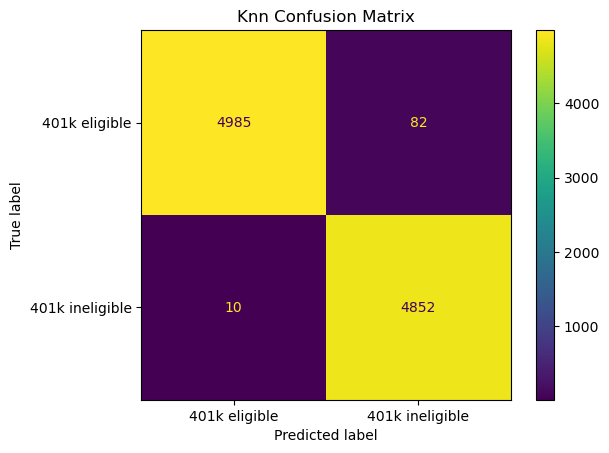

In [15]:
%%time
model_knn = grid_custom(df, 
                        'knn', 
                        hps[0])

In [16]:
# Create Submission CSV
def submission(X, 
               model):
    """This function saves predictions to a .csv file in the ./data folder
    args:
        X: pandas dataframe that models were trained on
        model: list of pre-fit models to ensemble
    """
    predictions = model.predict(X)
    pd.DataFrame(predictions).rename(columns={0:'wage'}).to_csv('../data/submission/submission.csv', 
                                                                index=False)

In [17]:
submission(df_test, model_knn)

In [18]:
print(f"Test df shape: {df_test.shape}")
print(f"Test predictions shape: {pd.read_csv('../data/submission/submission.csv').shape}")

Test df shape: (16281, 78)
Test predictions shape: (16281, 1)


## Evaluation

Here are metrics to evaluate different classifier models. 

|Model Type|Train Accuracy|Test Accuracy|Specificity|Precision|Sensitivity|
|--|--|--|--|--|--|
|Logistic Regression|0.823|0.814|0.796|0.797|0.833
|KNN|1.000|0.991|0.984|0.983|0.998|
|SVM|0.875|0.866|0.816|0.827|0.918|

## Conclusion and Recommendations

- The training data was bootstrapped due to a small data set, and KNN outperformed all other models. 
- Ensembling models was attempted initially but was abandoned because KNN performed much better. 
- However, the model is overfit due to training on bootstrapped data, and it may perform poorly on unseen data.
- Suggestions for improvement include testing other models, collecting more data from a real-world dataset, and engineering new features.

Our group work is saved here: [LINK](https://git.generalassemb.ly/skibokate/hackathon-good-fast-cheap)